In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data /quick exploration

In [3]:
data = pd.read_csv('movies_last.csv')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id
0,0,0,Star Wars: Episode VII - The Force Awakens,(2015),7.9,81,799424,"936,662,225","\nAction, Adventure, Sci-Fi",tt2488496
1,1,1,Avengers: Endgame,(2019),8.5,78,598830,"858,373,000","\nAction, Adventure, Drama",tt4154796
2,2,2,Avatar,(2009),7.8,83,1065708,"760,507,625","\nAction, Adventure, Fantasy",tt0499549
3,3,3,Black Panther,(2018),7.3,88,550256,"700,059,566","\nAction, Adventure, Sci-Fi",tt1825683
4,4,4,Avengers: Infinity War,(2018),8.5,68,723574,"678,815,482","\nAction, Adventure, Sci-Fi",tt4154756


In [5]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
all_titles    5050 non-null object
all_years     5050 non-null object
all_scores    5050 non-null object
all_meta      5050 non-null object
all_votes     5050 non-null object
all_gross     5050 non-null object
all_genres    5050 non-null object
id            5050 non-null object
dtypes: object(8)
memory usage: 315.7+ KB


In [7]:
data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id
0,Star Wars: Episode VII - The Force Awakens,(2015),7.9,81,799424,"936,662,225","\nAction, Adventure, Sci-Fi",tt2488496
1,Avengers: Endgame,(2019),8.5,78,598830,"858,373,000","\nAction, Adventure, Drama",tt4154796
2,Avatar,(2009),7.8,83,1065708,"760,507,625","\nAction, Adventure, Fantasy",tt0499549
3,Black Panther,(2018),7.3,88,550256,"700,059,566","\nAction, Adventure, Sci-Fi",tt1825683
4,Avengers: Infinity War,(2018),8.5,68,723574,"678,815,482","\nAction, Adventure, Sci-Fi",tt4154756


# Clean data 

In [8]:
import re

In [9]:
data['all_years'] = data['all_years'].apply(lambda x: re.sub('[^0-9]','', x))

data['all_genres'] = data['all_genres'].apply(lambda x: x[1:])

data['all_gross'] = data['all_gross'].apply(lambda x: x.replace(',',''))
data['all_gross'] = data['all_gross'].apply(lambda x:  int(x) if x != 'no' else 0)

data['all_scores'] = data['all_scores'].apply(lambda x: x.replace('.',''))
data['all_scores'] = data['all_scores'].apply(lambda x: int(x) if x != 'NO' else 0)

data['all_meta'] = data['all_meta'].apply(lambda x: int(x.replace('.','')) if x != 'no' else 0)

data['all_years'] = data['all_years'].apply(lambda x: int(x))




In [10]:
# data.all_years.value_counts(normalize=True).sort_index()

In [11]:
# sns.distplot(data.all_gross)

In [12]:
# sns.distplot(data.all_meta)

# Importing external csv to get the budget 

In [13]:
movies_metadata = pd.read_csv('movies_metadata.csv')

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
budget_and_id = movies_metadata[['budget', 'imdb_id']]

In [15]:
# budget_and_id

# Creating new dataframe

In [16]:
all_data = pd.merge(data, budget_and_id,how='left', left_on='id', right_on='imdb_id')

In [17]:
all_data.head(5)

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,budget,imdb_id
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,245000000,tt2488496
1,Avengers: Endgame,2019,85,78,598830,858373000,"Action, Adventure, Drama",tt4154796,NaN,NaN
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,237000000,tt0499549
3,Black Panther,2018,73,88,550256,700059566,"Action, Adventure, Sci-Fi",tt1825683,NaN,NaN
4,Avengers: Infinity War,2018,85,68,723574,678815482,"Action, Adventure, Sci-Fi",tt4154756,NaN,NaN


In [20]:
all_data.dropna(inplace=True)


In [21]:
all_data['budget'] = all_data['budget'].astype(int)

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 5053
Data columns (total 10 columns):
all_titles    4745 non-null object
all_years     4745 non-null int64
all_scores    4745 non-null int64
all_meta      4745 non-null int64
all_votes     4745 non-null object
all_gross     4745 non-null int64
all_genres    4745 non-null object
id            4745 non-null object
budget        4745 non-null int64
imdb_id       4745 non-null object
dtypes: int64(5), object(5)
memory usage: 407.8+ KB


In [23]:
# sns.distplot(all_data.all_years)

In [24]:
all_data['genre_bis'] = all_data['all_genres'].apply(lambda x: 'Action' if 'Action' in x
                                                     else ('Romance' if 'Romance' in x else 'no'))

In [25]:
all_data.genre_bis.value_counts()

no         2685
Action     1219
Romance     841
Name: genre_bis, dtype: int64

In [26]:
all_data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,budget,imdb_id,genre_bis
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,245000000,tt2488496,Action
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,237000000,tt0499549,Action
5,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,200000000,tt0120338,Romance
6,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,150000000,tt0369610,Action
7,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,220000000,tt0848228,Action


In [27]:
all_data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,budget,imdb_id,genre_bis
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,245000000,tt2488496,Action
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,237000000,tt0499549,Action
5,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,200000000,tt0120338,Romance
6,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,150000000,tt0369610,Action
7,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,220000000,tt0848228,Action


In [28]:
all_data['profit'] = all_data['all_gross'] - all_data['budget']

In [29]:
all_data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,budget,imdb_id,genre_bis,profit
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,245000000,tt2488496,Action,691662225
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,237000000,tt0499549,Action,523507625
5,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,200000000,tt0120338,Romance,459325379
6,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,150000000,tt0369610,Action,502270625
7,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,220000000,tt0848228,Action,403279547


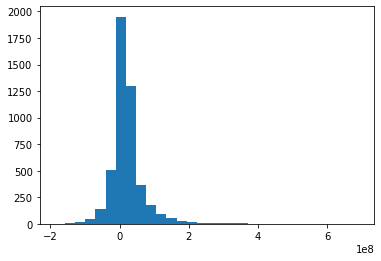

In [30]:
plt.hist(all_data.profit, bins = 30)

plt.show()

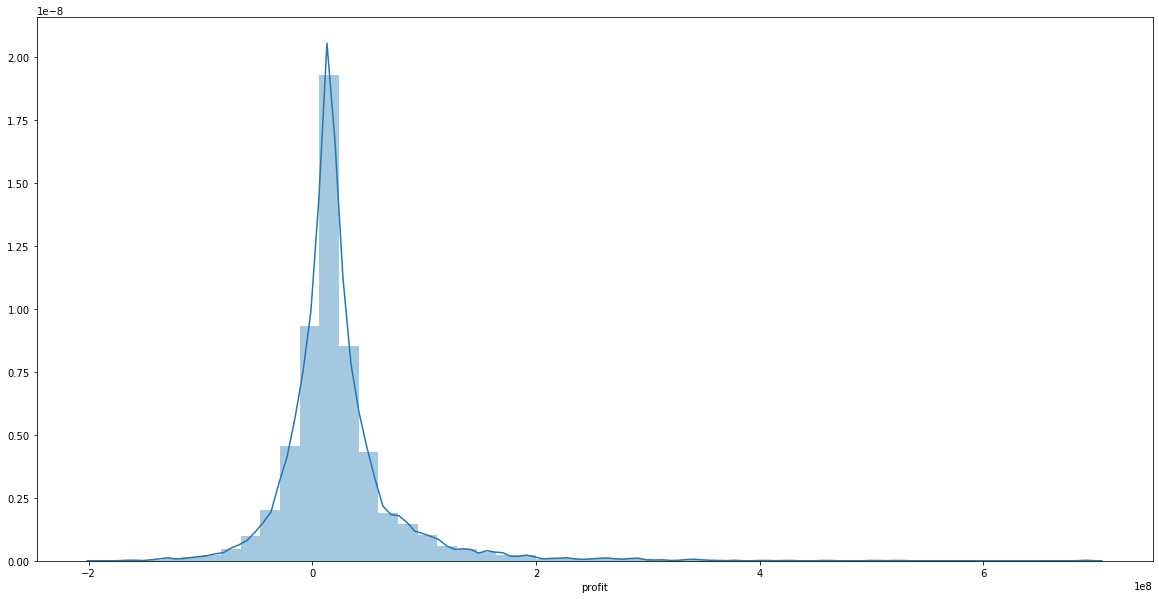

In [51]:
plt.figure(figsize = (20,10))
sns.distplot(all_data.profit)

In [57]:

print("The mean for for both Action and romance genre is :",all_data.profit.mean())
print("The std for both Action and Romance genre is :",all_data.profit.std())
print("The var for both Action and Romance genre is :",all_data.profit.var())

The mean for for both Action and romance genre is : 22427145.981243413
The std for both Action and Romance genre is : 50907105.503445014
The var for both Action and Romance genre is : 2591533390738881.5


In [32]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
all_years,4745.0,1.997441e+03,1.421973e+01,1915.0,1989.0,2000.0,2008.0,2019.0
all_scores,4745.0,6.411001e+01,9.699865e+00,19.0,58.0,64.0,71.0,93.0
all_meta,4745.0,4.572540e+01,2.572250e+01,0.0,32.0,49.0,64.0,100.0
all_gross,4745.0,5.492750e+07,6.538154e+07,9074550.0,17488564.0,32682342.0,64378093.0,936662225.0
budget,4745.0,3.250036e+07,4.274091e+07,0.0,130000.0,18500000.0,45000000.0,380000000.0
profit,4745.0,2.242715e+07,5.090711e+07,-186921900.0,573641.0,15073942.0,33545092.0,691662225.0


In [38]:
all_data[all_data['profit'] == -186921900.0]

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,budget,imdb_id,genre_bis,profit
1093,John Carter,2012,66,51,245185,73078100,"Action, Adventure, Sci-Fi",tt0401729,260000000,tt0401729,Action,-186921900


In [36]:
x = all_data[all_data['genre_bis'] == 'Action']

In [39]:
y = all_data[all_data['genre_bis'] == 'Romance']

### Getting the distribution curve for each genre

The mean for genre Action is : 18296452.958162427
The std for genre Action is : 68562371.25812644
The var for genre Action is : 4700798752537163.0


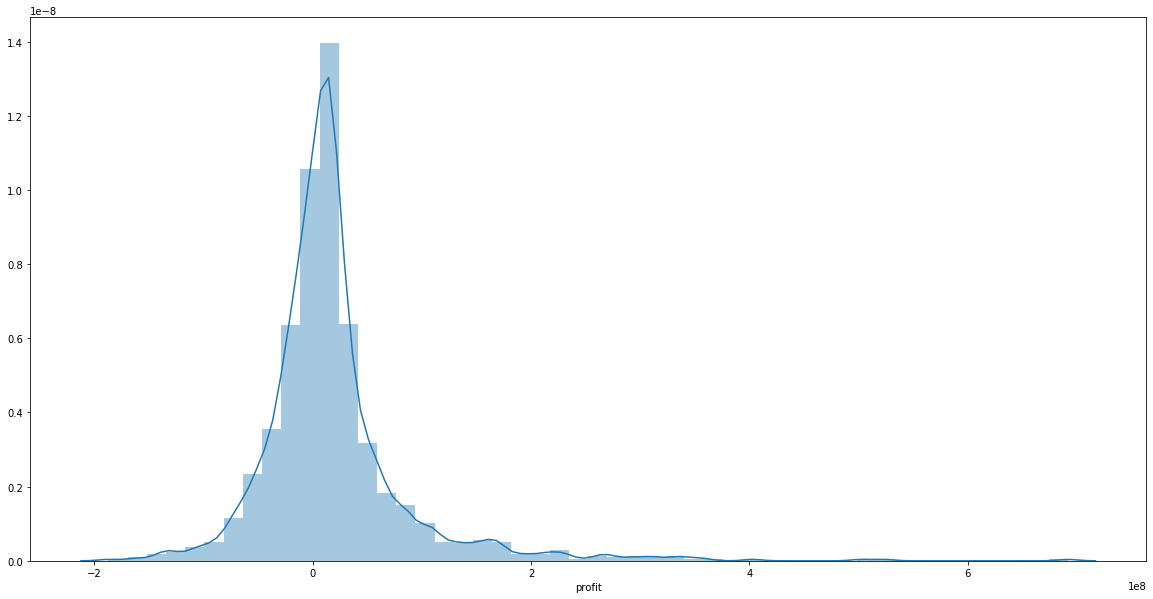

In [56]:
#Action Genre
plt.figure(figsize = (20,10))
sns.distplot(x.profit)
print("The mean for genre Action is :",x.profit.mean())
print("The std for genre Action is :",x.profit.std())
print("The var for genre Action is :",x.profit.var())

The mean for genre Romance is : 22884872.492271107
The std for genre Romance is : 38527269.52571875
The var for genre Romance is : 1484350497107376.5


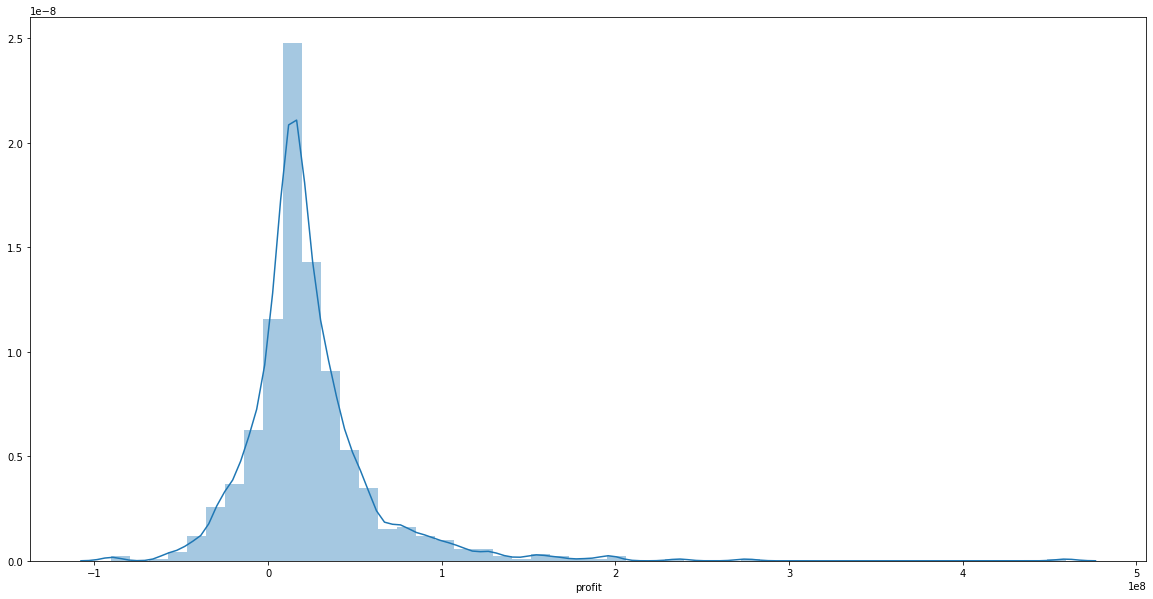

In [55]:
#Romance genre
plt.figure(figsize = (20,10))
sns.distplot(y.profit)
print("The mean for genre Romance is :",y.profit.mean())
print("The std for genre Romance is :",y.profit.std())
print("The var for genre Romance is :",y.profit.var())

### Performing the 2 sample t-test for the Action and Romance Genre

In [58]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

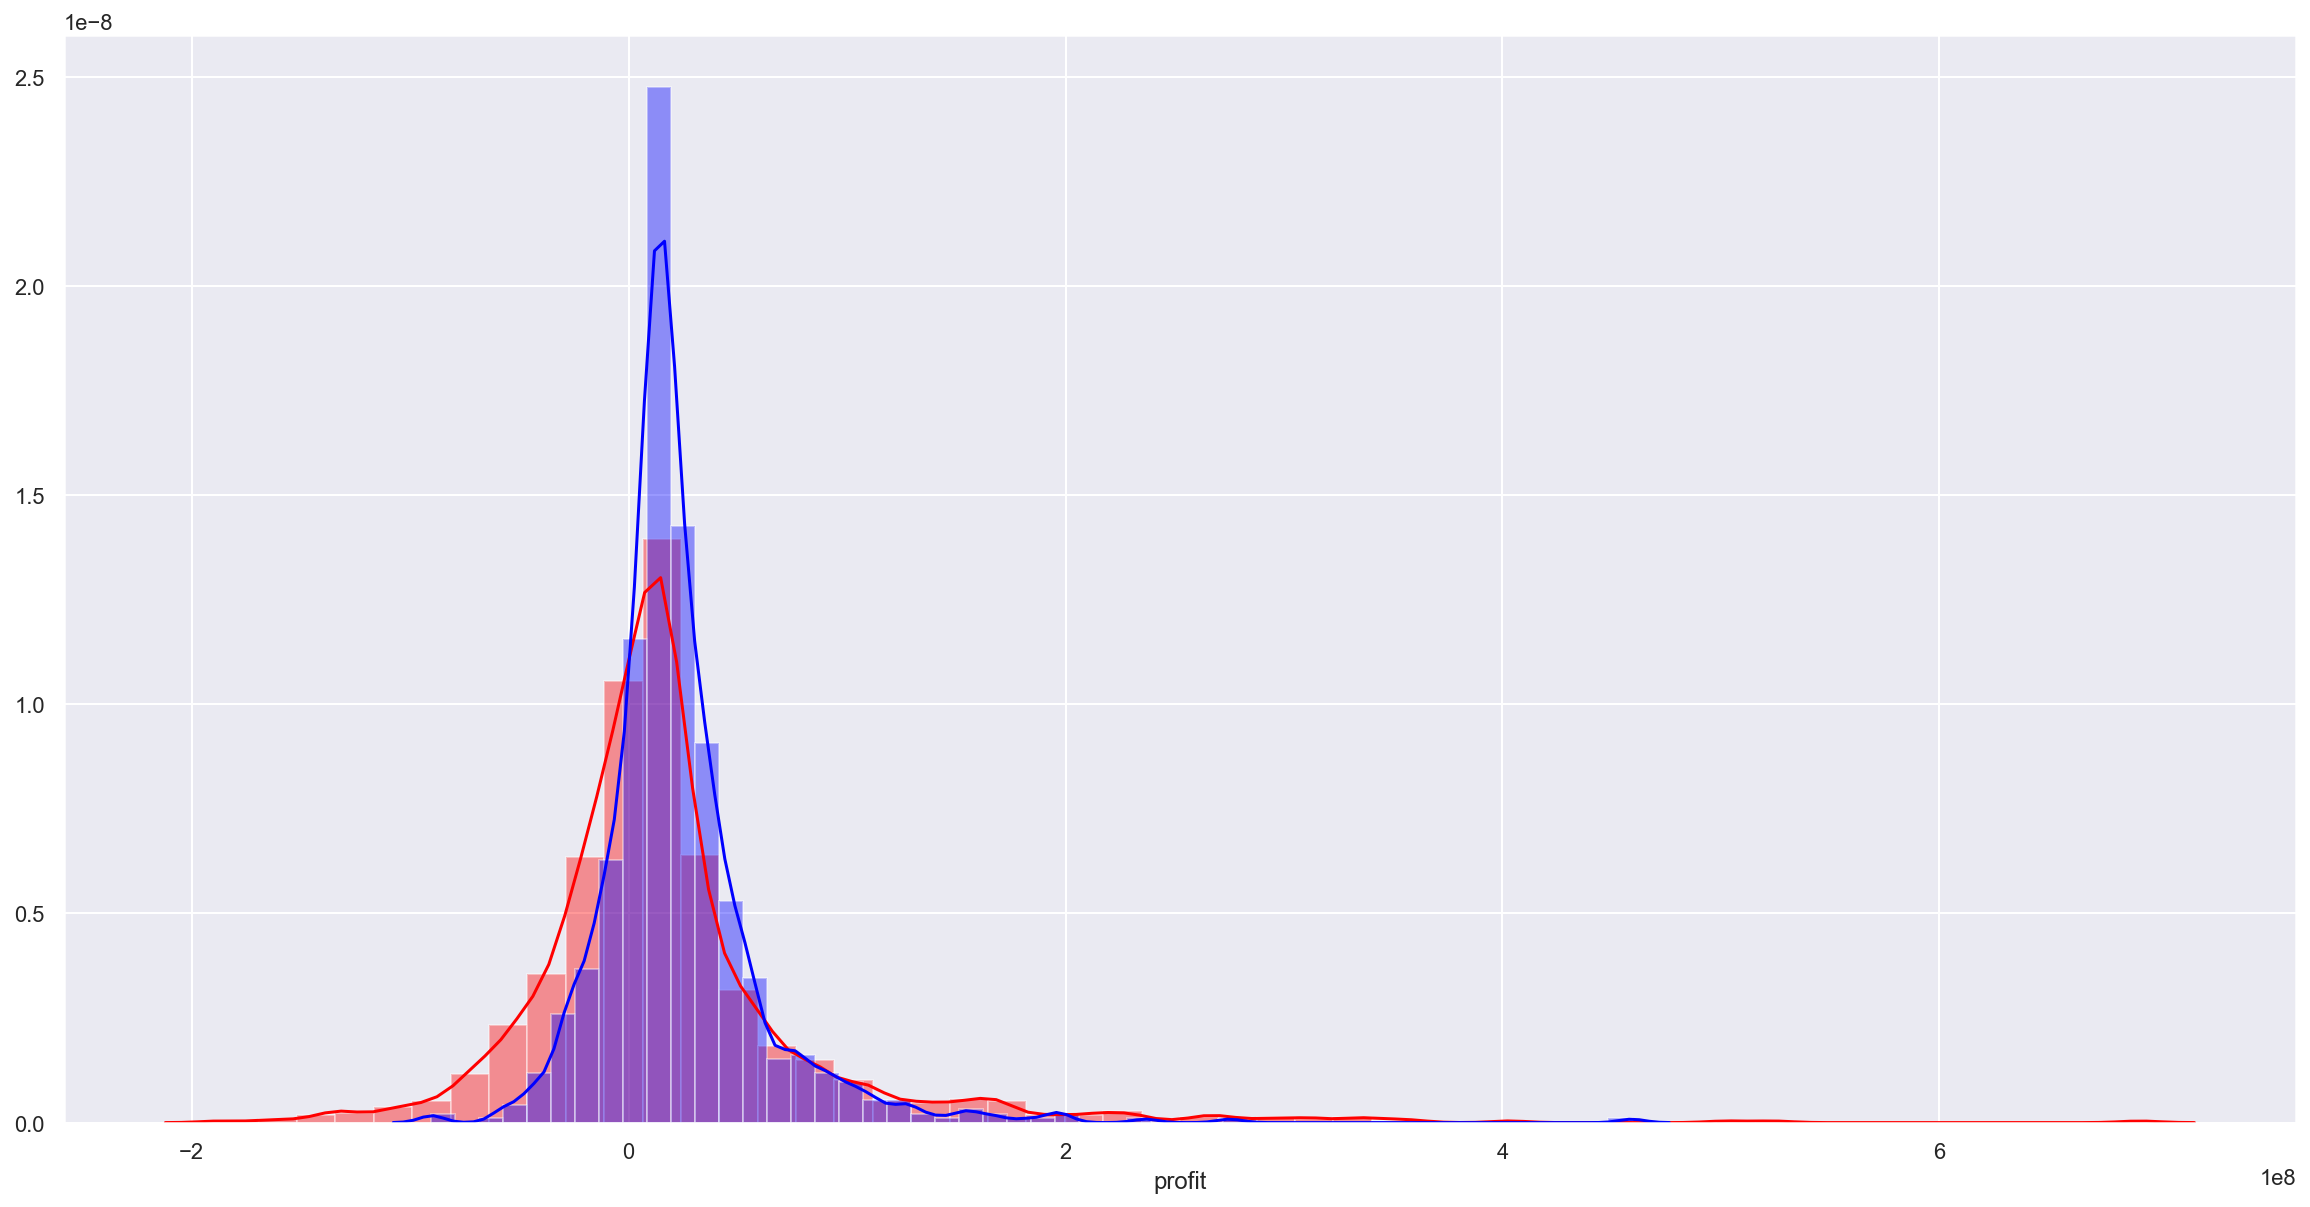

In [60]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(x.profit, color = 'red') # Action distribution
sns.distplot(y.profit, color = 'blue') # Romance distribution



There are some slight differences between the mean and standard deviation of the Action Genre and Romance genre. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not. As a reminder the five steps to performing a hypothesis test are:

Our five steps to further on carry on this experiment is listed below:

1.Set up null and alternative hypotheses

2.Choose a significance level

3.Calculate the test statistic

4.Determine the critical or p-value (find the rejection region)

5.Compare t-value with critical t-value to reject or fail to reject the null hypothesis

**The Null hypotheis is that there is no difference between the profit margins of the Action Genre and the Romance Genre Ho.**

**The Alternative Hypothesis is that Action Genre has a higher profit margin than Romance Genre - Ha**

In [62]:
# difference between samples
diff = x.profit.mean() - y.profit.mean()
print(diff)

-4588419.53410868


In [63]:
#function to calculate t-statistic
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [64]:
#pooled variance to calculate the variance for both samples
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [65]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

In [66]:
t_stat = twosample_tstatistic(x.profit, y.profit)
t_stat

-1.7585715724992412

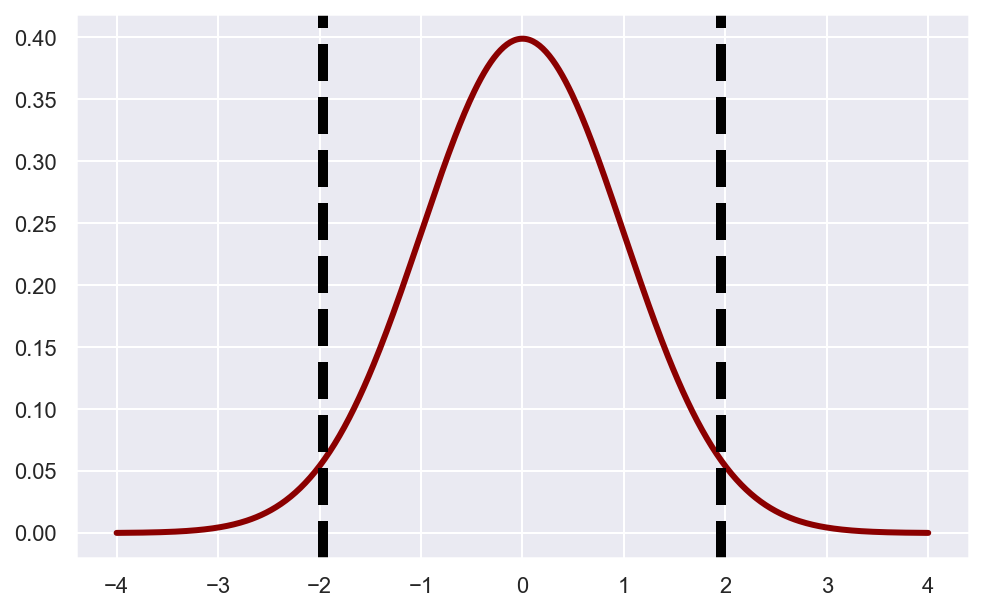

In [68]:
def visualize_t(t_stat, n_control, n_experimental):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_control: int
    n_experiment: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    plt.show()
    return None

n_control = len(x.profit)
n_experimental = len(y.profit)
visualize_t(t_stat, n_control, n_experimental)

To calculate the p-value by calculating the total area under curve using stats.t.cdf().

In [69]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-1.75, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(1.75, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.08324829759071847


In [70]:
# using scipy .stats to confirm
"""Calculates the ttest for the means of *two independent* samples of data.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default."""
stats.ttest_ind(x.profit, y.profit)

Ttest_indResult(statistic=-1.7585715724992412, pvalue=0.07879891715438218)

Since the p-value is greater than alpha (p > .05), then we fail to reject the null hypothesis, and we say that the result is statistically nonsignificant (n.s.)

To calculate the effect size and the probability density function

In [74]:
import scipy.stats
action_mean = x.profit.mean()
action_std = x.profit.std()

# Generate a normal distribution for action profit 
action_profit = scipy.stats.norm(action_mean, action_std)
action_profit

In [75]:
romance_mean = y.profit.mean()
romance_std = y.profit.std()

# Generate a normal distribution for romance profit
romance_profit = scipy.stats.norm(romance_mean, romance_std)
romance_profit

In [76]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Text(0.5, 0, 'profit($)')

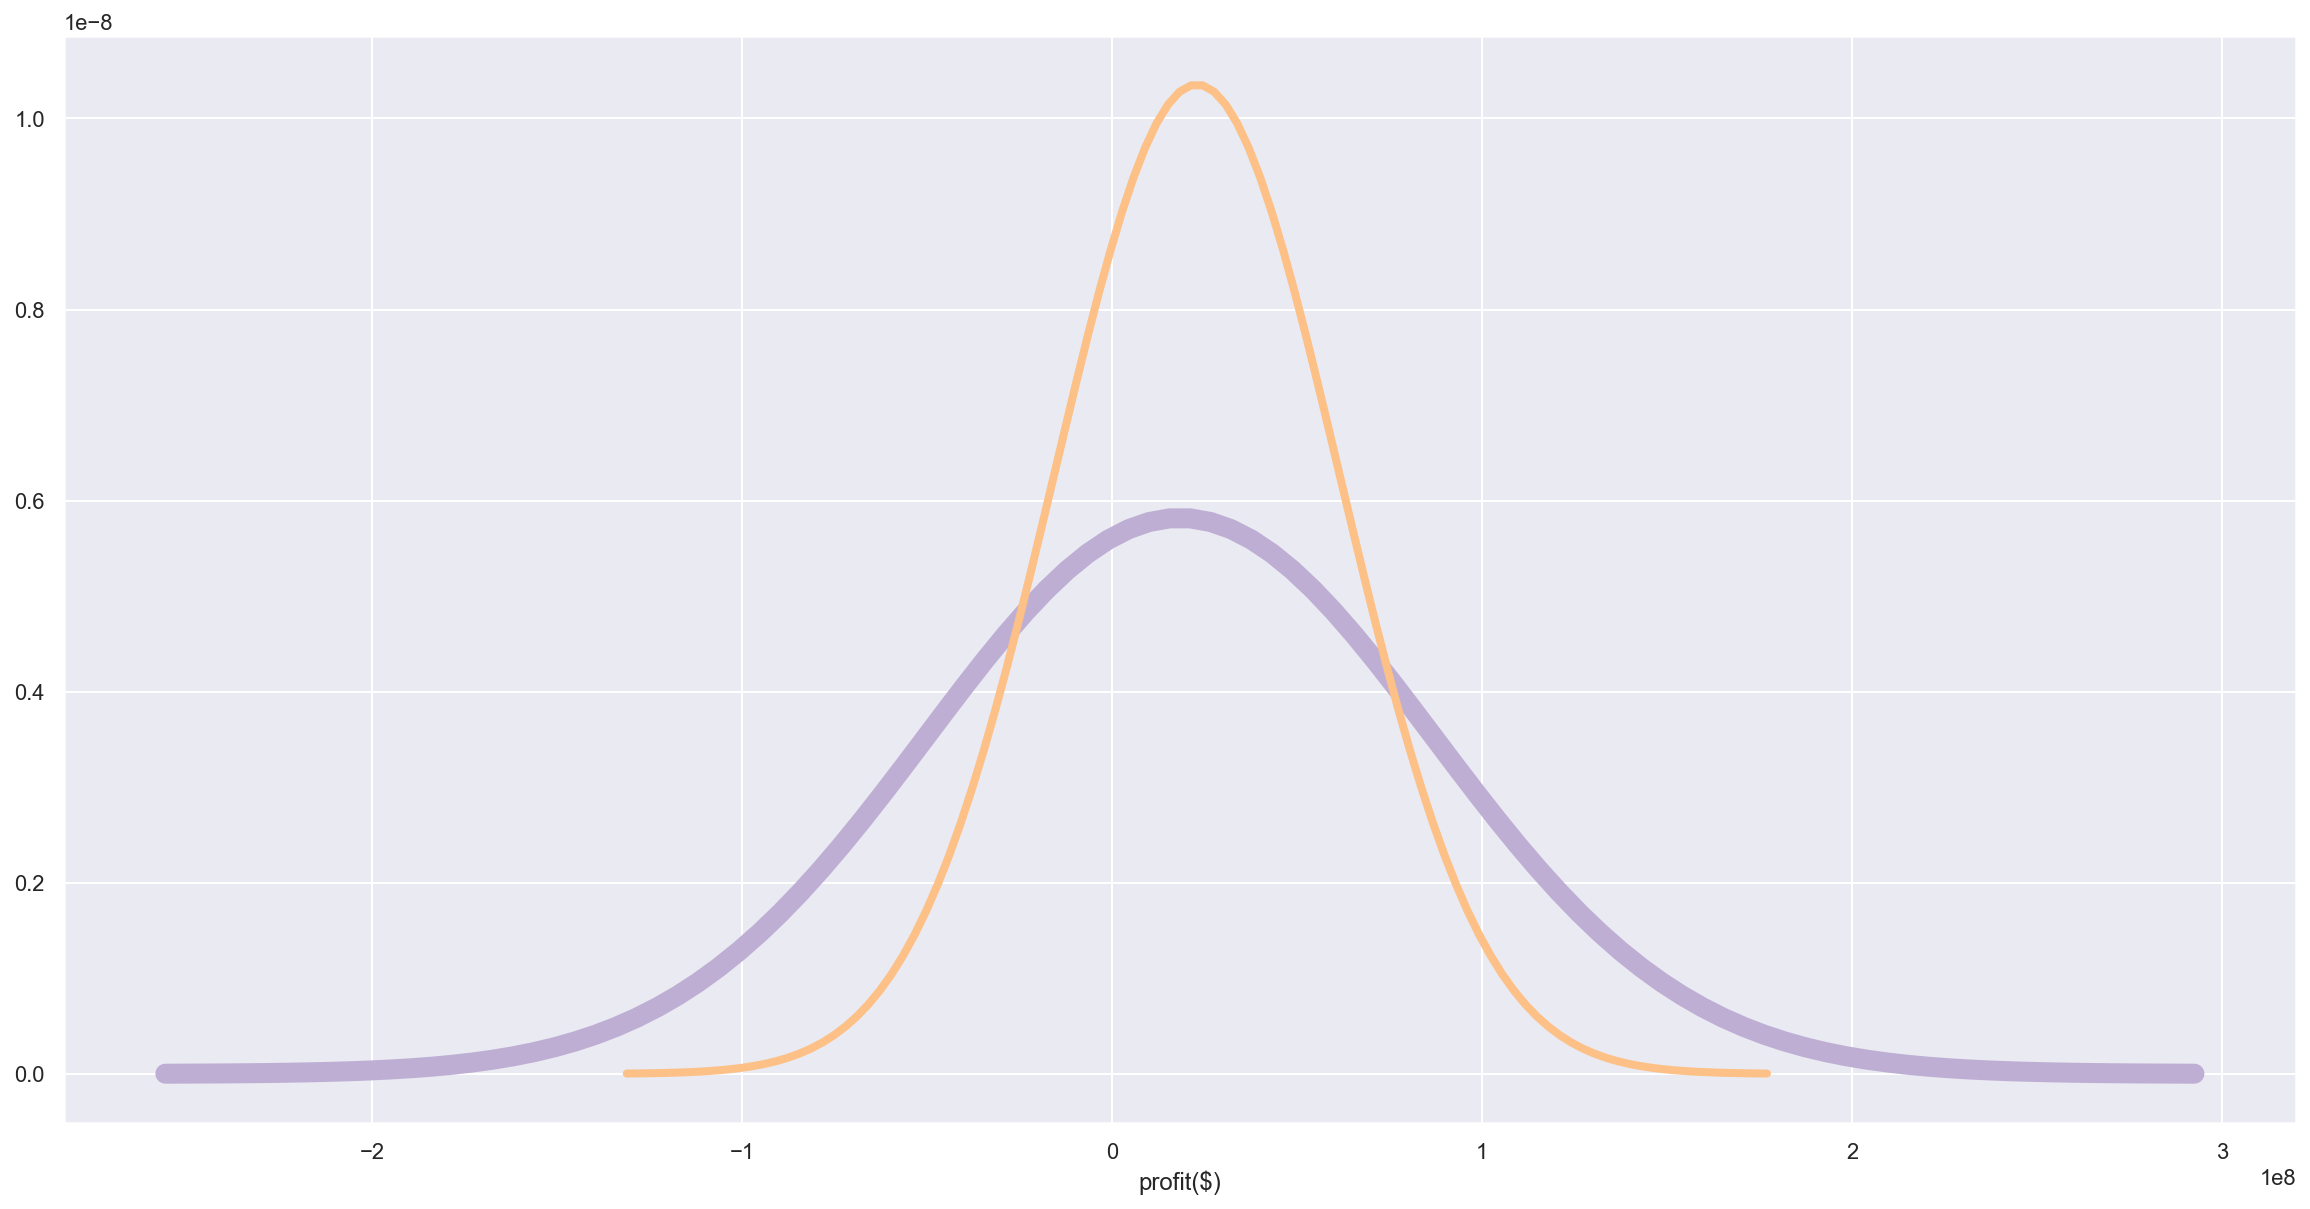

In [78]:
xs, ys = evaluate_PDF(action_profit)
plt.plot(xs, ys, label='action', linewidth=10, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(romance_profit)
plt.plot(xs, ys, label='romance', linewidth=4, color='#fdc086')

plt.xlabel('profit($)')

For the Un-standardized or Simple Effect Size Calculation

In [87]:
action_sample = action_profit.rvs(1000)
mean1, std1 = action_sample.mean(), action_sample.std()
mean1, std1

(16131723.934603648, 69919421.32345559)

In [88]:
romance_sample = romance_profit.rvs(1000)
mean2, std2 = romance_sample.mean(), romance_sample.std()
mean2, std2

(22434571.049309023, 38548942.3887633)

In [89]:
difference_in_means = action_sample.mean() - romance_sample.mean()
difference_in_means

-6302847.114705374

In [90]:
relative_difference = difference_in_means / action_sample.mean()
relative_difference * 100

-39.07113176655185

In [91]:
relative_difference = difference_in_means / romance_sample.mean()
relative_difference * 100

-28.09435090536086

In [92]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

20194580.677972853

In [113]:
thresh = (mean1 + mean2) / 2
thresh
    

19283147.491956335

In [114]:
action_below_thresh = sum(action_sample < thresh)
action_below_thresh

519

In [115]:
romance_above_thresh = sum(romance_sample > thresh)
romance_above_thresh

520

Text(0.5, 0, 'profit($)')

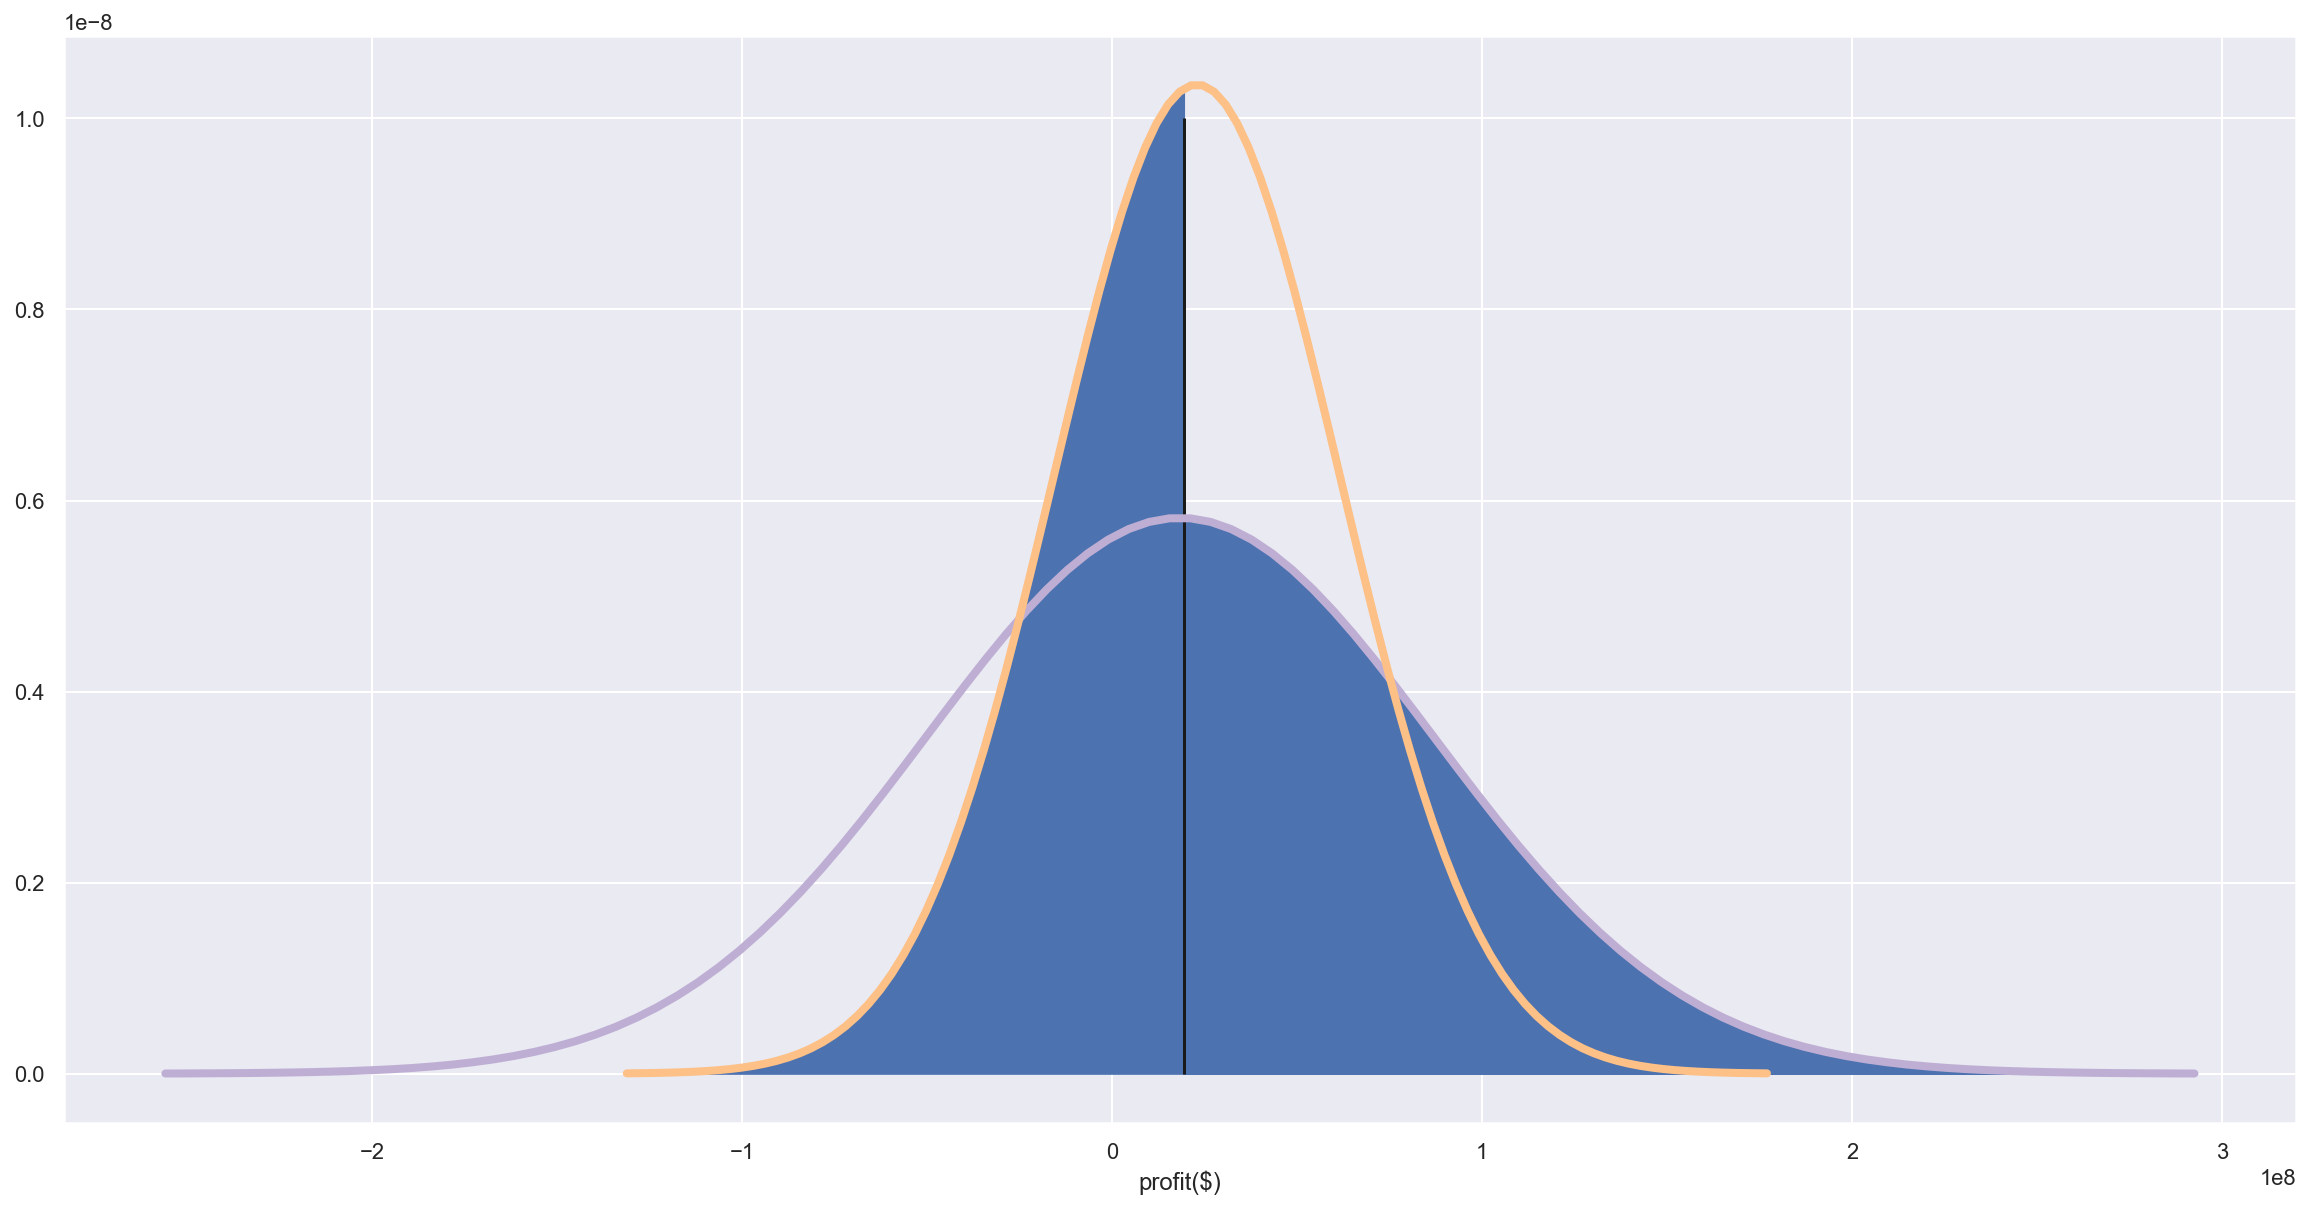

In [116]:
#PDF for both distributions
a_xs,action_ys = evaluate_PDF(action_profit)
plt.plot(a_xs, action_ys, label='action', linewidth=4, color='#beaed4') 

#Female height 
r_xs, romance_ys = evaluate_PDF(romance_profit)
plt.plot(r_xs, romance_ys, label='romance', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.00000001)
plt.fill_betweenx(romance_ys,x1 = r_xs,x2=thresh, where = r_xs < thresh,color='b')
plt.fill_betweenx(action_ys,x1=a_xs,x2=thresh, where = a_xs > thresh,color='b')
plt.xlabel('profit($)')

In [117]:
overlap = action_below_thresh / len(action_sample) + romance_above_thresh / len(romance_sample)
overlap

1.0390000000000001

In [118]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [119]:
overlap_superiority(romance_profit, 
                    action_profit, n=1000)

20590662.72521677


(0.966, 0.531)

In [109]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [111]:
Cohen_d(romance_sample, action_sample)

0.11164012475903418

### WELCH TEST FOR THE ACTION AND ROMANCE GENRE